In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
df = pd.read_csv('dataset/spam.csv', encoding='latin-1')
print(df.shape)
df.head()

(5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Model Evaluation
6. Improving the Model
7. Website
8. Deployment

# 1. Data Cleaning

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [93]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [94]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [95]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [96]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [97]:
df['target'] = encoder.fit_transform(df['target'])

In [98]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [99]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [100]:
df.duplicated().sum()

403

In [101]:
# remove duplicate values
df.drop_duplicates(keep='first', inplace=True)

In [102]:
print(df.shape)
df.duplicated().sum()

(5169, 2)


0

# 2. EDA

In [103]:
df.value_counts('target')

target
0    4516
1     653
dtype: int64

In [104]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

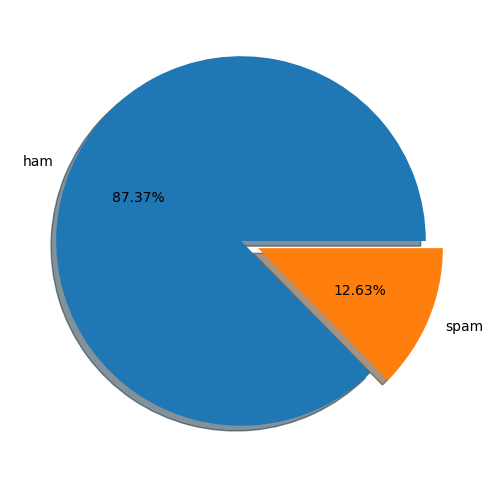

In [105]:
plt.figure(figsize=(12, 6))
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], 
        autopct='%1.2f%%', shadow=True, explode=[0, 0.1])
plt.show()

            Therefore data is imbalanced.

In [106]:
import nltk

In [107]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhavy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [108]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [109]:
df['num_characters'] = df['text'].apply(len)

In [110]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [111]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [112]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [113]:
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [114]:
df.head()

,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [115]:
df.shape

(5169, 5)

In [116]:
df[df['target']==0][['num_characters', 'num_words', 'num_sent']].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [117]:
df[df['target']==1][['num_characters', 'num_words', 'num_sent']].describe()

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot: xlabel='num_characters', ylabel='Count'>

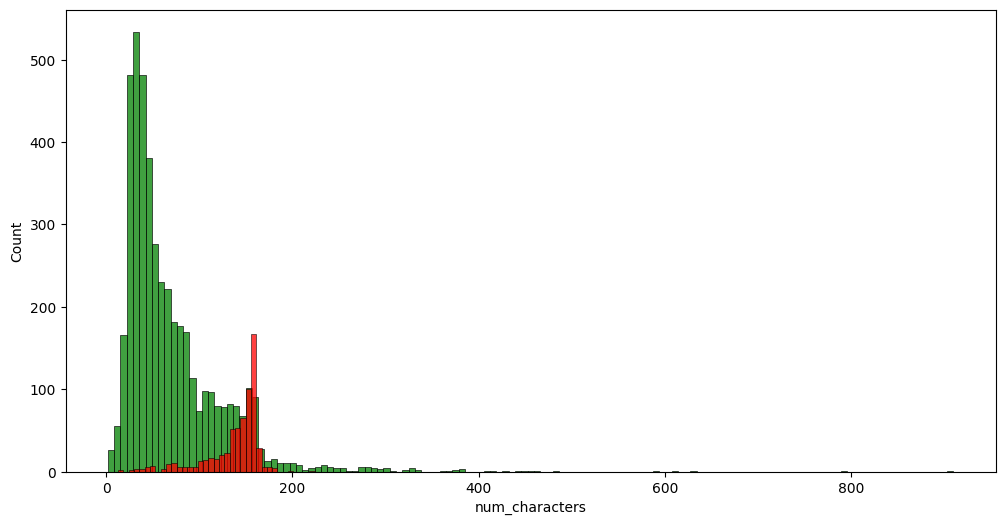

In [118]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target']==0], x='num_characters', color='green', label='ham')
sns.histplot(df[df['target']==1], x='num_characters', color='red', label='spam')

<AxesSubplot: xlabel='num_words', ylabel='Count'>

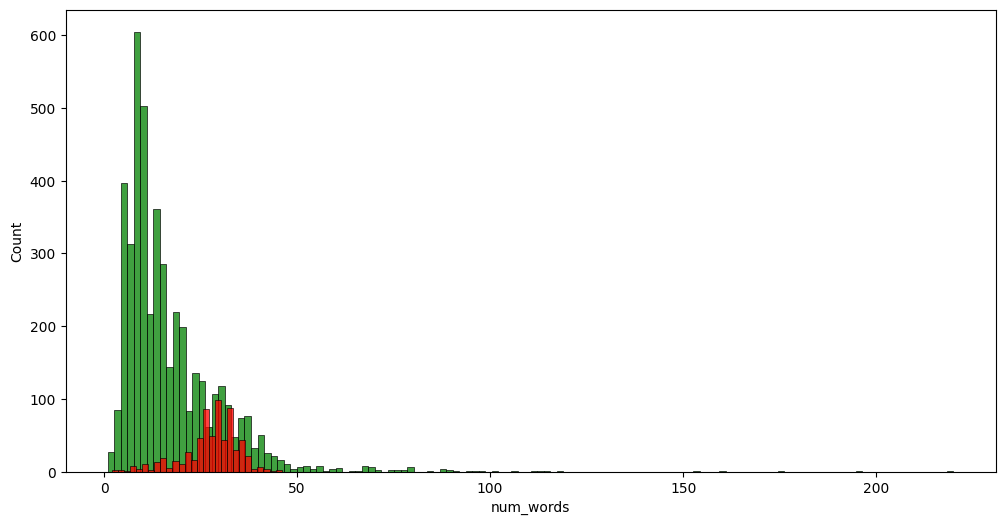

In [119]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target']==0], x='num_words', color='green', label='ham')
sns.histplot(df[df['target']==1], x='num_words', color='red', label='spam')

<AxesSubplot: xlabel='num_sent', ylabel='Count'>

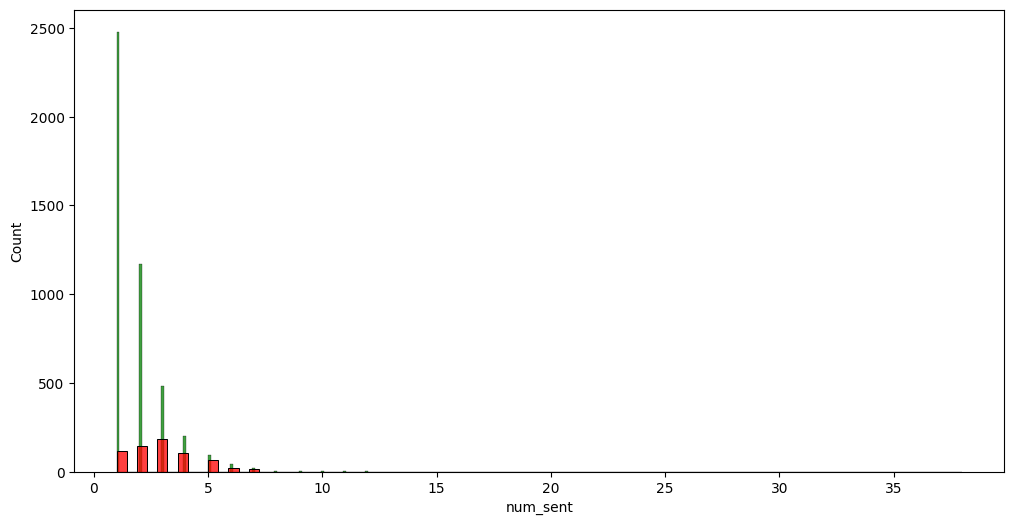

In [120]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target']==0], x='num_sent', color='green', label='ham')
sns.histplot(df[df['target']==1], x='num_sent', color='red', label='spam')

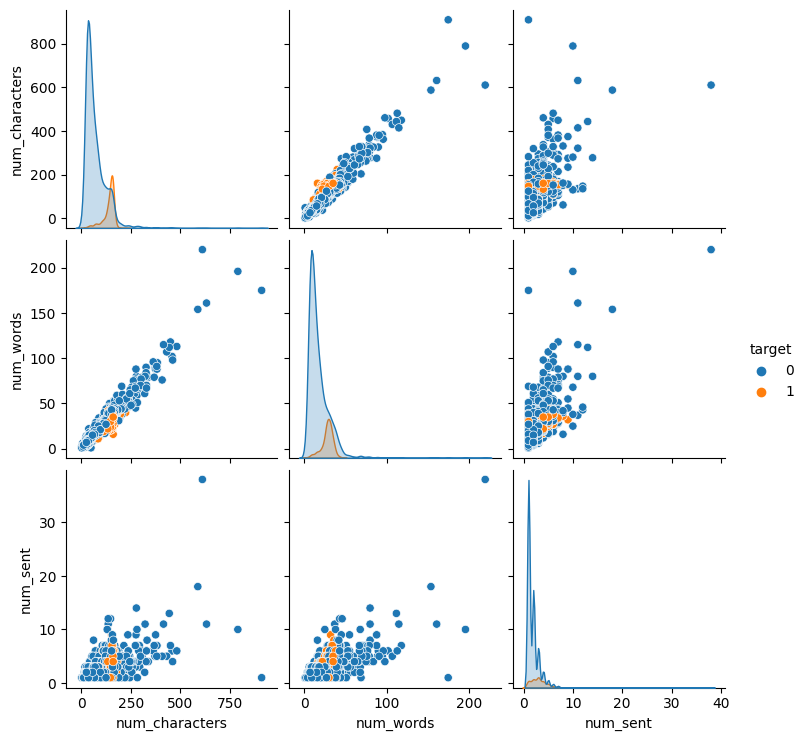

In [121]:
sns.pairplot(df, hue='target')

In [122]:
df.corr()

C:\Users\bhavy\AppData\Local\Temp\ipykernel_11768\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_characters,num_words,num_sent
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sent,0.263939,0.624139,0.679971,1.000000


C:\Users\bhavy\AppData\Local\Temp\ipykernel_11768\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

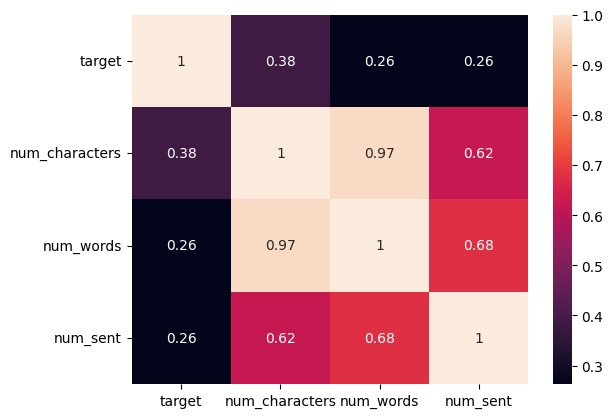

In [123]:
sns.heatmap(df.corr(), annot=True)

# 3. Text/Data Preprocessing
- Lower case
- Tokenzation
- Removing Special Characters
- Removing Stopwords and Punctuations
- Stemming

In [124]:
from nltk.corpus import stopwords

In [129]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhavy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [130]:
from nltk.stem import WordNetLemmatizer

In [133]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhavy\AppData\Roaming\nltk_data...


True

In [134]:
def clean_text(text):

    # Convert all text to lowercase
    text = text.lower()

    # Tokenize the text into individual words
    text = nltk.word_tokenize(text)

    # Remove any non-alphanumeric characters from the text
    text = [word for word in text if word.isalnum()]

    # Remove any stopwords (common words that don't add much meaning to the text)
    text = [word for word in text if word not in stopwords.words('english')]

    # Lemmatize the remaining words (reduce them to their base form) OR stemming
    text = [WordNetLemmatizer().lemmatize(word, pos='v') for word in text]

    # Join the words back together into a single string
    text = ' '.join(text)

    # Return the cleaned text
    return text

In [135]:
df['text'].apply(clean_text)

0       go jurong point crazy available bugis n great ...
1                                   ok lar joke wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                     nah think go usf live around though
                              ...                        
5567    2nd time try 2 contact u pound prize 2 claim e...
5568                               b go esplanade fr home
5569                                pity mood suggestions
5570    guy bitch act like interest buy something else...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [136]:
df['clean_text'] = df['text'].apply(clean_text)

In [137]:
df.head()

,target,text,num_characters,num_words,num_sent,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf live around though


In [138]:
from wordcloud import WordCloud
wc = WordCloud(width=600, height=400, background_color='white', random_state=42)

In [139]:
spam_wc = wc.generate(df[df['target']==1]['clean_text'].str.cat(sep=' '))

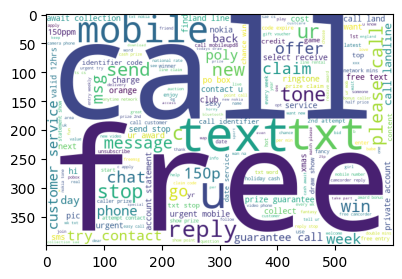

In [141]:
plt.figure(figsize=(12, 3))
plt.imshow(spam_wc)

In [142]:
ham_wc = wc.generate(df[df['target']==0]['clean_text'].str.cat(sep=' '))

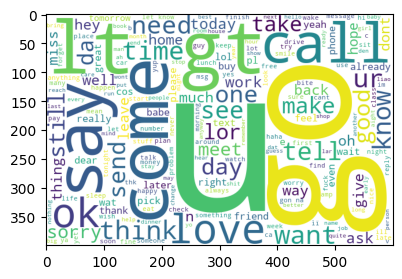

In [143]:
plt.figure(figsize=(12, 3))
plt.imshow(ham_wc)

In [144]:
spam_corpus = []
for text in df[df['target']==1]['clean_text'].tolist():
    for word in text.split():
        spam_corpus.append(word)

In [147]:
len(spam_corpus)

9939

In [160]:
from collections import Counter

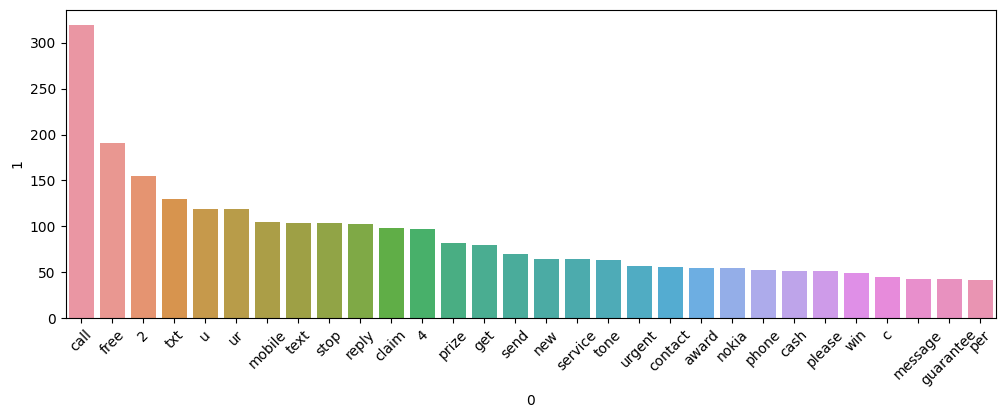

In [171]:
plt.figure(figsize=(12, 4))
X = pd.DataFrame(Counter(spam_corpus).most_common(30))[0]
Y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1]
sns.barplot(x=X, y=Y)
plt.xticks(rotation=45)
plt.show()

In [164]:
ham_corpus = []
for text in df[df['target']==0]['clean_text'].tolist():
    for word in text.split():
        ham_corpus.append(word)

In [165]:
len(ham_corpus)

35404

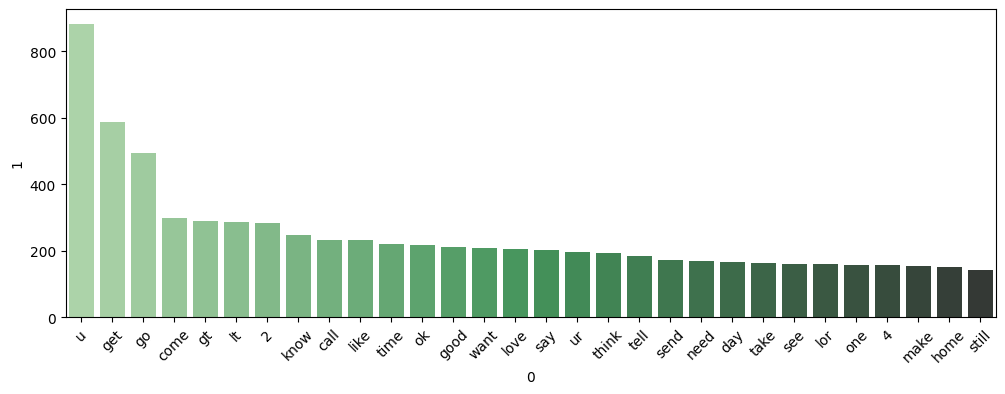

In [173]:
plt.figure(figsize=(12, 4))
X = pd.DataFrame(Counter(ham_corpus).most_common(30))[0]
Y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1]
sns.barplot(x=X,y=Y, palette='Greens_d', label='ham')
plt.xticks(rotation=45)
plt.show()

# 4. Model Building

In [174]:
df.head()

,target,text,num_characters,num_words,num_sent,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf live around though


In [175]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [177]:
X = cv.fit_transform(df['clean_text']).toarray()

In [186]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [179]:
X.shape

(5169, 7055)

In [184]:
df['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: int32

In [185]:
df['target'].values

array([0, 0, 1, ..., 0, 0, 0])

In [180]:
y = df['target'].values

In [182]:
y.shape

(5169,)

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [189]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score

In [188]:
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()

In [190]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print('GaussianNB Accuracy: ', accuracy_score(y_test, y_pred1))
print('GaussianNB Precision: ', precision_score(y_test, y_pred1))
print('GaussianNB Confusion Matrix: \n', confusion_matrix(y_test, y_pred1))
print('GaussianNB Classification Report: \n', classification_report(y_test, y_pred1))

GaussianNB Accuracy:  0.8655705996131529
GaussianNB Precision:  0.512396694214876
GaussianNB Confusion Matrix: 
 [[771 118]
 [ 21 124]]
GaussianNB Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.87      0.92       889
           1       0.51      0.86      0.64       145

    accuracy                           0.87      1034
   macro avg       0.74      0.86      0.78      1034
weighted avg       0.91      0.87      0.88      1034



In [191]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print('MultinomialNB Accuracy: ', accuracy_score(y_test, y_pred2))
print('MultinomialNB Precision: ', precision_score(y_test, y_pred2))
print('MultinomialNB Confusion Matrix: \n', confusion_matrix(y_test, y_pred2))
print('MultinomialNB Classification Report: \n', classification_report(y_test, y_pred2))

MultinomialNB Accuracy:  0.9748549323017408
MultinomialNB Precision:  0.8993288590604027
MultinomialNB Confusion Matrix: 
 [[874  15]
 [ 11 134]]
MultinomialNB Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       889
           1       0.90      0.92      0.91       145

    accuracy                           0.97      1034
   macro avg       0.94      0.95      0.95      1034
weighted avg       0.98      0.97      0.97      1034



In [192]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print('BernoulliNB Accuracy: ', accuracy_score(y_test, y_pred3))
print('BernoulliNB Precision: ', precision_score(y_test, y_pred3))
print('BernoulliNB Confusion Matrix: \n', confusion_matrix(y_test, y_pred3))
print('BernoulliNB Classification Report: \n', classification_report(y_test, y_pred3))

BernoulliNB Accuracy:  0.9642166344294004
BernoulliNB Precision:  0.9655172413793104
BernoulliNB Confusion Matrix: 
 [[885   4]
 [ 33 112]]
BernoulliNB Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.97      0.77      0.86       145

    accuracy                           0.96      1034
   macro avg       0.96      0.88      0.92      1034
weighted avg       0.96      0.96      0.96      1034



    Using TF-IDF Vectorizer instead of Count Vectorizer because it gives more weightage to the rare words.

In [193]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [194]:
X = tfidf.fit_transform(df['clean_text']).toarray()

In [195]:
y = df['target'].values

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [197]:
mnb2 = MultinomialNB()
bnb2 = BernoulliNB()
gnb2 = GaussianNB()

In [198]:
gnb2.fit(X_train, y_train)
y_pred4 = gnb2.predict(X_test)
print('GaussianNB Accuracy: ', accuracy_score(y_test, y_pred4))
print('GaussianNB Precision: ', precision_score(y_test, y_pred4))
print('GaussianNB Confusion Matrix: \n', confusion_matrix(y_test, y_pred4))
print('GaussianNB Classification Report: \n', classification_report(y_test, y_pred4))

GaussianNB Accuracy:  0.8636363636363636
GaussianNB Precision:  0.5083333333333333
GaussianNB Confusion Matrix: 
 [[771 118]
 [ 23 122]]
GaussianNB Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.87      0.92       889
           1       0.51      0.84      0.63       145

    accuracy                           0.86      1034
   macro avg       0.74      0.85      0.77      1034
weighted avg       0.91      0.86      0.88      1034



In [199]:
mnb2.fit(X_train, y_train)
y_pred5 = mnb2.predict(X_test)
print('MultinomialNB Accuracy: ', accuracy_score(y_test, y_pred5))
print('MultinomialNB Precision: ', precision_score(y_test, y_pred5))
print('MultinomialNB Confusion Matrix: \n', confusion_matrix(y_test, y_pred5))
print('MultinomialNB Classification Report: \n', classification_report(y_test, y_pred5))

MultinomialNB Accuracy:  0.9593810444874274
MultinomialNB Precision:  1.0
MultinomialNB Confusion Matrix: 
 [[889   0]
 [ 42 103]]
MultinomialNB Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       889
           1       1.00      0.71      0.83       145

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.90      1034
weighted avg       0.96      0.96      0.96      1034



In [200]:
bnb2.fit(X_train, y_train)
y_pred6 = bnb2.predict(X_test)
print('BernoulliNB Accuracy: ', accuracy_score(y_test, y_pred6))
print('BernoulliNB Precision: ', precision_score(y_test, y_pred6))
print('BernoulliNB Confusion Matrix: \n', confusion_matrix(y_test, y_pred6))
print('BernoulliNB Classification Report: \n', classification_report(y_test, y_pred6))

BernoulliNB Accuracy:  0.9642166344294004
BernoulliNB Precision:  0.9655172413793104
BernoulliNB Confusion Matrix: 
 [[885   4]
 [ 33 112]]
BernoulliNB Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.97      0.77      0.86       145

    accuracy                           0.96      1034
   macro avg       0.96      0.88      0.92      1034
weighted avg       0.96      0.96      0.96      1034



# Best Model: Multinomial Naive Bayes with TF-IDF Vectorizer
    Precision: 1.0
    and here precision is more important than recall because we don't want to classify a ham message as spam.

# Testing all models and selecting the best model based on precision score

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score


In [202]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
abc = AdaBoostClassifier(n_estimators=50, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=42)
etc = ExtraTreesClassifier(n_estimators=50, random_state=42)
bc = BaggingClassifier(n_estimators=50, random_state=42)
xgb = XGBClassifier(n_estimators=50, random_state=42)
lr = LogisticRegression(solver='liblinear', penalty='l1')
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()


In [203]:
classifiers = [('Support Vector Machine', svc),
                ('K Nearest Neighbours', knn),
                ('Decision Tree Classifier', dtc),
                ('Random Forest Classifier', rfc),
                ('AdaBoost Classifier', abc),
                ('Gradient Boosting Classifier', gbc),
                ('Extra Trees Classifier', etc),
                ('Bagging Classifier', bc),
                ('XGBoost Classifier', xgb),
                ('Logistic Regression', lr),
                ('Multinomial Naive Bayes', mnb),
                ('Bernoulli Naive Bayes', bnb),
                ('Gaussian Naive Bayes', gnb)]

In [204]:
len(classifiers)

13

In [207]:
def train_classifier(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [208]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.971953578336557, 0.953125)

In [ ]:
accuracy_scores = []
precision_scores = []

for i in range(len(classifiers)):
    print('Training', classifiers[i][0], '...')
    accuracy, precision = train_classifier(classifiers[i][1], X_train, y_train, X_test, y_test)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print()

In [232]:
clfs = dict(classifiers)
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,
                               'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,K Nearest Neighbours,0.895551,1.000000
10,Multinomial Naive Bayes,0.959381,1.000000
6,Extra Trees Classifier,0.972921,0.991597
3,Random Forest Classifier,0.966151,0.991071
11,Bernoulli Naive Bayes,0.964217,0.965517
0,Support Vector Machine,0.971954,0.953125
5,Gradient Boosting Classifier,0.953578,0.944954
8,XGBoost Classifier,0.969052,0.912409
7,Bagging Classifier,0.964217,0.902985
9,Logistic Regression,0.941006,0.855932


# Voting Classifier

In [245]:
knn = KNeighborsClassifier(n_neighbors=8)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [246]:
from sklearn.ensemble import VotingClassifier

In [247]:
voting = VotingClassifier(estimators=[('K Nearest Neighbours', knn),
                                        ('Multinomial Naive Bayes', mnb),
                                        ('Extra Trees Classifier', etc),
                                        ('Random Forest Classifier', rfc)],
                            voting='soft')

In [248]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('K Nearest Neighbours',
                              KNeighborsClassifier(n_neighbors=8)),
                             ('Multinomial Naive Bayes', MultinomialNB()),
                             ('Extra Trees Classifier',
                              ExtraTreesClassifier(random_state=42)),
                             ('Random Forest Classifier',
                              RandomForestClassifier(random_state=42))],
                 voting='soft')

In [249]:
y_pred = voting.predict(X_test)
print('Voting Classifier Accuracy: ', accuracy_score(y_test, y_pred))
print('Voting Classifier Precision: ', precision_score(y_test, y_pred))
print('Voting Classifier Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Voting Classifier Classification Report: \n', classification_report(y_test, y_pred))

Voting Classifier Accuracy:  0.9526112185686654
Voting Classifier Precision:  1.0
Voting Classifier Confusion Matrix: 
 [[889   0]
 [ 49  96]]
Voting Classifier Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       1.00      0.66      0.80       145

    accuracy                           0.95      1034
   macro avg       0.97      0.83      0.88      1034
weighted avg       0.96      0.95      0.95      1034



In [251]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [252]:
y_pred = mnb.predict(X_test)
print('MultinomialNB Accuracy: ', accuracy_score(y_test, y_pred))
print('MultinomialNB Precision: ', precision_score(y_test, y_pred))
print('MultinomialNB Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('MultinomialNB Classification Report: \n', classification_report(y_test, y_pred))

MultinomialNB Accuracy:  0.9593810444874274
MultinomialNB Precision:  1.0
MultinomialNB Confusion Matrix: 
 [[889   0]
 [ 42 103]]
MultinomialNB Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       889
           1       1.00      0.71      0.83       145

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.90      1034
weighted avg       0.96      0.96      0.96      1034



# Stacking Classifier

In [254]:
estimators = [('K Nearest Neighbours', knn),
                ('Multinomial Naive Bayes', mnb),
                ('Extra Trees Classifier', etc),
                ('Random Forest Classifier', rfc)]
final_estimator = RandomForestClassifier(n_estimators=100, random_state=42)

In [255]:
from sklearn.ensemble import StackingClassifier

In [256]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [257]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('K Nearest Neighbours',
                                KNeighborsClassifier(n_neighbors=8)),
                               ('Multinomial Naive Bayes', MultinomialNB()),
                               ('Extra Trees Classifier',
                                ExtraTreesClassifier(random_state=42)),
                               ('Random Forest Classifier',
                                RandomForestClassifier(random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=42))

In [258]:
y_pred = clf.predict(X_test)
print('Stacking Classifier Accuracy: ', accuracy_score(y_test, y_pred))
print('Stacking Classifier Precision: ', precision_score(y_test, y_pred))
print('Stacking Classifier Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Stacking Classifier Classification Report: \n', classification_report(y_test, y_pred))

Stacking Classifier Accuracy:  0.9816247582205029
Stacking Classifier Precision:  0.95
Stacking Classifier Confusion Matrix: 
 [[882   7]
 [ 12 133]]
Stacking Classifier Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       889
           1       0.95      0.92      0.93       145

    accuracy                           0.98      1034
   macro avg       0.97      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034

